In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score


import warnings
warnings.filterwarnings("ignore")

In [2]:
d0 = pd.read_csv(r'C:\Users\gaura\OneDrive\Documents\LiveUpdate\mnist_train.csv')

In [3]:
d0.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
l = d0['label']
d = d0.drop("label",axis=1)

In [5]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


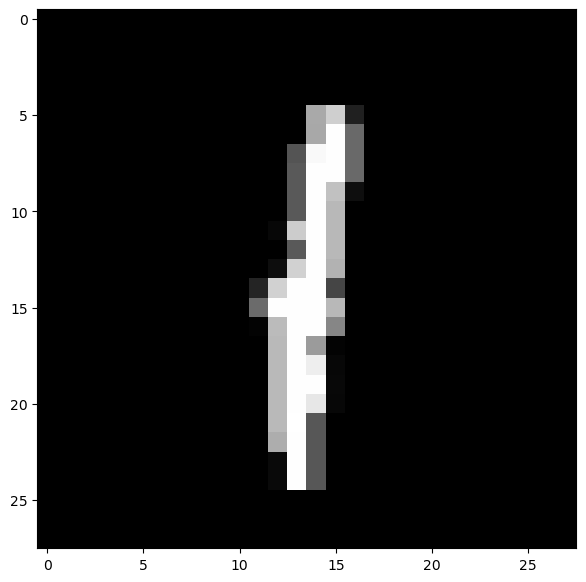

1


In [127]:
plt.figure(figsize=(7,7))
idx = 12

grid_data = d.iloc[idx].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

<Axes: xlabel='label', ylabel='count'>

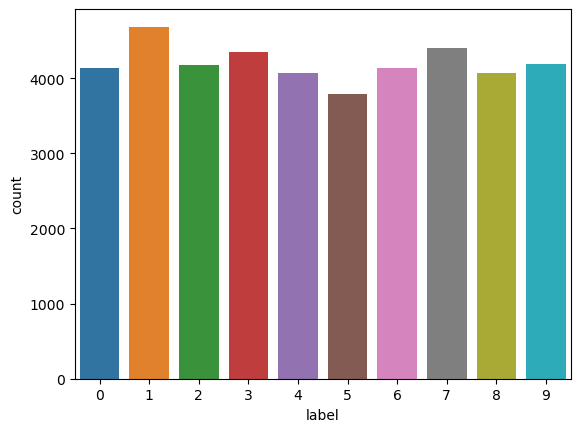

In [7]:
sns.countplot(d0['label'])

In [113]:
# test1 = 0.2
# test2 = 0.5
# test3 = 0.8
test4 = 0.01

X_train, X_test, y_train, y_test = train_test_split(d, l, test_size = test4, random_state = 42)

In [114]:
y_train

31974    1
26991    6
10378    0
36183    9
28569    0
        ..
6265     9
11284    9
38158    2
860      6
15795    0
Name: label, Length: 41580, dtype: int64

In [93]:
scaling = StandardScaler()
scaling.fit(X_train, y_train)
X_train = scaling.transform(X_train)
X_train.shape

(8400, 784)

In [115]:
def train_and_evaluate(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(f'Accuracy Score is: {accuracy_score(y_test, y_pred)}')
    print('\nClassification Report: ')
    print(classification_report(y_test, y_pred))
    print('\nConfusion Matrix: ')
    print(confusion_matrix(y_test, y_pred))

In [116]:
# Example usage with KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=10)
train_and_evaluate(knn_classifier, X_train, y_train, X_test, y_test)

Accuracy Score is: 0.9642857142857143

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.95      1.00      0.97        56
           2       0.97      0.97      0.97        38
           3       0.94      0.98      0.96        48
           4       0.97      1.00      0.98        29
           5       0.96      0.90      0.93        29
           6       0.98      1.00      0.99        53
           7       0.96      0.94      0.95        52
           8       0.96      0.93      0.95        28
           9       0.96      0.91      0.93        47

    accuracy                           0.96       420
   macro avg       0.97      0.96      0.96       420
weighted avg       0.96      0.96      0.96       420


Confusion Matrix: 
[[39  0  0  0  0  0  1  0  0  0]
 [ 0 56  0  0  0  0  0  0  0  0]
 [ 0  0 37  0  0  0  0  0  1  0]
 [ 0  0  0 47  0  0  0  1  0  0]
 [ 0  0  0  0 29  0  0  0 

In [117]:
# Create a logistic regression classifier
logistic_classifier = LogisticRegression()

# Train and evaluate the model
train_and_evaluate(logistic_classifier, X_train, y_train, X_test, y_test)


Accuracy Score is: 0.9142857142857143

Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       1.00      0.96      0.98        56
           2       0.89      0.84      0.86        38
           3       0.91      0.88      0.89        48
           4       0.87      0.93      0.90        29
           5       0.89      0.86      0.88        29
           6       0.95      0.98      0.96        53
           7       0.94      0.90      0.92        52
           8       0.74      0.93      0.83        28
           9       0.89      0.85      0.87        47

    accuracy                           0.91       420
   macro avg       0.91      0.91      0.91       420
weighted avg       0.92      0.91      0.91       420


Confusion Matrix: 
[[39  0  0  0  0  0  1  0  0  0]
 [ 0 54  0  0  0  0  0  0  1  1]
 [ 1  0 32  1  1  0  0  0  3  0]
 [ 0  0  1 42  0  1  0  1  3  0]
 [ 0  0  0  0 27  0  1  1 

In [118]:
from sklearn.svm import SVC

# Create a support vector classifier
svc_classifier = SVC(kernel = 'poly', C = 30, gamma = 0.001)

# Train and evaluate the model
train_and_evaluate(svc_classifier, X_train, y_train, X_test, y_test)

Accuracy Score is: 0.9738095238095238

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       1.00      1.00      1.00        56
           2       0.97      1.00      0.99        38
           3       0.96      0.98      0.97        48
           4       1.00      1.00      1.00        29
           5       0.93      0.93      0.93        29
           6       0.98      1.00      0.99        53
           7       0.96      0.98      0.97        52
           8       0.96      0.96      0.96        28
           9       0.95      0.89      0.92        47

    accuracy                           0.97       420
   macro avg       0.97      0.97      0.97       420
weighted avg       0.97      0.97      0.97       420


Confusion Matrix: 
[[39  0  0  0  0  0  1  0  0  0]
 [ 0 56  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 47  0  0  0  1  0  0]
 [ 0  0  0  0 29  0  0  0 

In [119]:
rf_classifier = RandomForestClassifier(n_estimators=50)


train_and_evaluate(rf_classifier, X_train, y_train, X_test, y_test)

Accuracy Score is: 0.9595238095238096

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       1.00      1.00      1.00        56
           2       0.95      0.95      0.95        38
           3       0.94      0.98      0.96        48
           4       0.88      1.00      0.94        29
           5       1.00      0.90      0.95        29
           6       0.96      1.00      0.98        53
           7       0.96      0.94      0.95        52
           8       0.93      0.96      0.95        28
           9       0.95      0.87      0.91        47

    accuracy                           0.96       420
   macro avg       0.96      0.96      0.96       420
weighted avg       0.96      0.96      0.96       420


Confusion Matrix: 
[[39  0  0  0  0  0  1  0  0  0]
 [ 0 56  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  1  0  0  0  1  0]
 [ 0  0  0 47  0  0  0  1  0  0]
 [ 0  0  0  0 29  0  0  0 

In [103]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# evaluate the ensemble on the dataset using the resampling method
n_scores = cross_val_score(rf_classifier, X_train, y_train, scoring='accuracy', cv=cv)

In [105]:
# report ensemble performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.941 (0.010)
